In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)
lat_longs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_longs)
print(coordinates)

[(38.998409932106284, -135.29264228133056), (72.58416993473247, 89.05548799559631), (40.299496563904285, -26.168672640844505), (70.34714369265842, -146.17279153356355), (60.335881931359836, -117.91270968507759), (-59.56415438320437, 107.15894327967692), (-58.783577492484596, 84.42095840812198), (39.7484051179361, -133.59760060962884), (42.45428868218957, 140.05381349818538), (40.740633092317324, -41.10376456764749), (27.61820635226661, -137.71888830651991), (-60.22590211408536, -117.73156479249079), (70.72787678837915, 40.21335543994766), (16.873677324165456, -175.05599276795238), (56.71951428688817, 125.88863545928075), (-12.948084658855919, -78.42665769265949), (-62.75736403339111, -11.378965702205988), (-27.977347441106552, -24.867679677229688), (68.40697280770678, 82.62746129105), (41.63482074822636, -161.17141655091618), (-34.428044708077145, 105.40932991492252), (-87.82676423749595, -58.732978775304076), (-27.37382339891198, 27.562784257437187), (-87.79069558179626, 166.292770242

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=af55cc9dc1ae5b707a81a022e4e56f92


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | high level
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | iwanai
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | chulman
Processing Record 15 of Set 1 | lima
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | karaul
City not found. Skipping...
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | koppies
Processing Record 22 of Set 1 | bluff
Processing Recor

Processing Record 40 of Set 4 | harper
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | ulaangom
Processing Record 43 of Set 4 | salaspils
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | port-cartier
Processing Record 46 of Set 4 | haibowan
City not found. Skipping...
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | tome
Processing Record 49 of Set 4 | borgo san lorenzo
Processing Record 50 of Set 4 | bethel
Processing Record 1 of Set 5 | kurchum
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | burica
City not found. Skipping...
Processing Record 4 of Set 5 | oktyabrskiy
Processing Record 5 of Set 5 | hays
Processing Record 6 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 7 of Set 5 | mazagao
Processing Record 8 of Set 5 | menongue
Processing Record 9 of Set 5 | san isidro
Processing Record 10 of Set 5 | gaozhou
Processing Record 11 of S

Processing Record 28 of Set 8 | chama
Processing Record 29 of Set 8 | seoul
Processing Record 30 of Set 8 | nizhniy baskunchak
Processing Record 31 of Set 8 | alice town
Processing Record 32 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 33 of Set 8 | kokopo
Processing Record 34 of Set 8 | amberley
Processing Record 35 of Set 8 | wuxi
Processing Record 36 of Set 8 | starychi
Processing Record 37 of Set 8 | barranca
Processing Record 38 of Set 8 | kropotkin
Processing Record 39 of Set 8 | zhuanghe
Processing Record 40 of Set 8 | solwezi
Processing Record 41 of Set 8 | longjiang
Processing Record 42 of Set 8 | belen
Processing Record 43 of Set 8 | henties bay
Processing Record 44 of Set 8 | hue
Processing Record 45 of Set 8 | mabaruma
Processing Record 46 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 47 of Set 8 | morondava
Processing Record 48 of Set 8 | pangoa
Processing Record 49 of Set 8 | san carlos
Processing Record 50 of Set 8 | sorvag
Cit

Processing Record 14 of Set 12 | amparai
City not found. Skipping...
Processing Record 15 of Set 12 | svetlogorsk
Processing Record 16 of Set 12 | fort nelson
Processing Record 17 of Set 12 | andijon
Processing Record 18 of Set 12 | khonuu
City not found. Skipping...
Processing Record 19 of Set 12 | taoudenni
Processing Record 20 of Set 12 | aksarka
Processing Record 21 of Set 12 | patiya
Processing Record 22 of Set 12 | panambi
Processing Record 23 of Set 12 | mount pleasant
Processing Record 24 of Set 12 | makokou
Processing Record 25 of Set 12 | temaraia
City not found. Skipping...
Processing Record 26 of Set 12 | coetupo
City not found. Skipping...
Processing Record 27 of Set 12 | ancud
Processing Record 28 of Set 12 | tripoli
Processing Record 29 of Set 12 | port hardy
Processing Record 30 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 12 | puerto escondido
Processing Record 32 of Set 12 | matara
Processing Record 33 of Set 12 | salym
Processing 

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,70.20,66,1,5.01,US,2021-05-23 00:02:21
1,Talnakh,69.4865,88.3972,35.78,98,95,14.12,RU,2021-05-23 00:02:21
2,Praia Da Vitoria,38.7333,-27.0667,57.76,64,11,7.99,PT,2021-05-23 00:02:21
3,Fairbanks,64.8378,-147.7164,53.04,56,100,1.99,US,2021-05-23 00:02:22
4,High Level,58.5169,-117.1360,74.64,23,93,9.26,CA,2021-05-23 00:02:22
5,Albany,42.6001,-73.9662,78.75,72,97,10.18,US,2021-05-23 00:02:22
6,Busselton,-33.6500,115.3333,46.04,69,85,8.08,AU,2021-05-23 00:02:22
7,Iwanai,42.9744,140.5089,59.47,89,100,1.63,JP,2021-05-23 00:02:23
8,Ribeira Grande,38.5167,-28.7000,59.59,62,9,8.55,PT,2021-05-23 00:02:23
9,Pacific Grove,36.6177,-121.9166,75.25,78,20,8.99,US,2021-05-23 00:02:23


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2021-05-23 00:02:21,40.5982,-124.1573,70.20,66,1,5.01
1,Talnakh,RU,2021-05-23 00:02:21,69.4865,88.3972,35.78,98,95,14.12
2,Praia Da Vitoria,PT,2021-05-23 00:02:21,38.7333,-27.0667,57.76,64,11,7.99
3,Fairbanks,US,2021-05-23 00:02:22,64.8378,-147.7164,53.04,56,100,1.99
4,High Level,CA,2021-05-23 00:02:22,58.5169,-117.1360,74.64,23,93,9.26
...,...,...,...,...,...,...,...,...,...
558,Pisco,PE,2021-05-23 00:04:57,-13.7000,-76.2167,65.01,82,90,10.36
559,Mabiton,PH,2021-05-23 00:05:00,12.8334,123.2612,82.20,74,32,6.20
560,Nagar Karnul,IN,2021-05-23 00:05:00,16.4821,78.3247,80.28,69,60,12.48
561,Campbell River,CA,2021-05-23 00:00:27,50.0163,-125.2446,67.26,44,100,1.01


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

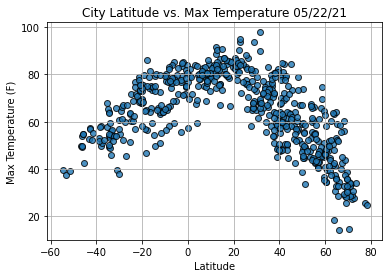

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

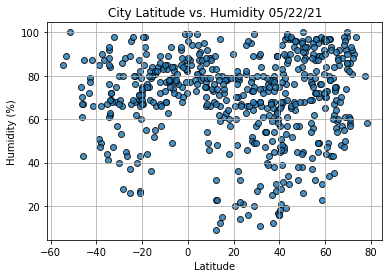

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

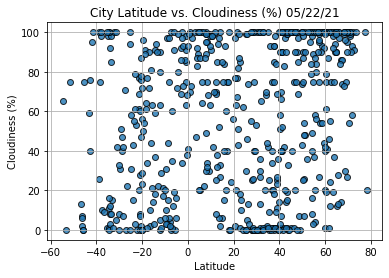

In [20]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

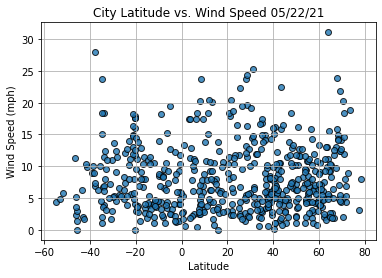

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()